This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

**Reading in training, validation, test datasets**

* Step 1: Download the compressed dataset
cats_vs_dogs_small.zip from Canvas. Note: this is a slightly different dataset as the book as it contains 2000 pictures for training, 1000 for validation and 1000 (as opposed to 2000) for testing.

* Step 2: Unzip the file onto your local drive.

* Step 3: Upload your unzipped files (all folders and files) to your Google Drive

Instructions: log into your Google Drive using the same google account of your Google Colab. Find the "Colab Notebooks" folder. Drag the cats_vs_dogs_small folder into the "Colab Notebooks" folder. This should upload all subfolders and pictures onto your Google Drive.

* Step 4: mount your Google Drive within Colab using the following code

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Step 5: find the path of your datafiles in Google Drive. On the left panel of Colab, Click File -> click folder content -> drive -> ...

For example, my path would look like something in the following: "/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small"

Then you can set the path to your files with the following code:

In [8]:
import os, shutil, pathlib

new_base_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
print(new_base_dir)


drive/MyDrive/Colab Notebooks/cats_vs_dogs_small


Question 1: Consider the Cats & Dogs example. Start initially with a training sample of 500, a validation sample of 250, and a test sample of 250. Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [9]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train1/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train1/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train1/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train1/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train1/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train1/test/dogs


## **Building the model**

# **Model 1**

**Instantiating a small convnet for dogs vs. cats classification**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using `image_dataset_from_directory` to read images**

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [13]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [14]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a `Dataset`**

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.4833 - loss: 0.7088 - val_accuracy: 0.6360 - val_loss: 0.6920
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.5527 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.7013
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5221 - loss: 0.6998 - val_accuracy: 0.5620 - val_loss: 0.6807
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5808 - loss: 0.6765 - val_accuracy: 0.5120 - val_loss: 0.6781
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6027 - loss: 0.6771 - val_accuracy: 0.6360 - val_loss: 0.6426
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6493 - loss: 0.6280 - val_accuracy: 0.6160 - val_loss: 0.6656
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6201 - loss: 0.6426 - val_accuracy: 0.5240 - val_loss: 0.8727
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6718 - loss: 0.6387 - val_accuracy: 0.6300 

**Displaying curves of loss and accuracy during training**

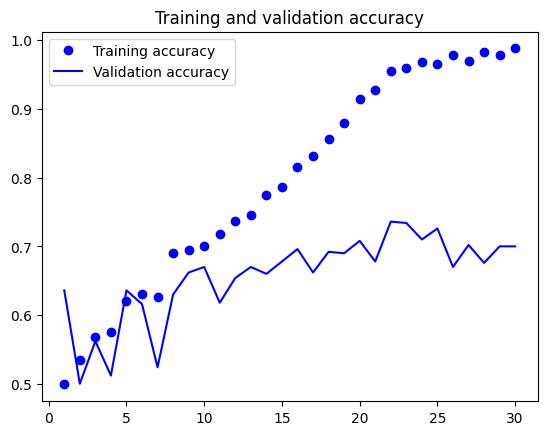

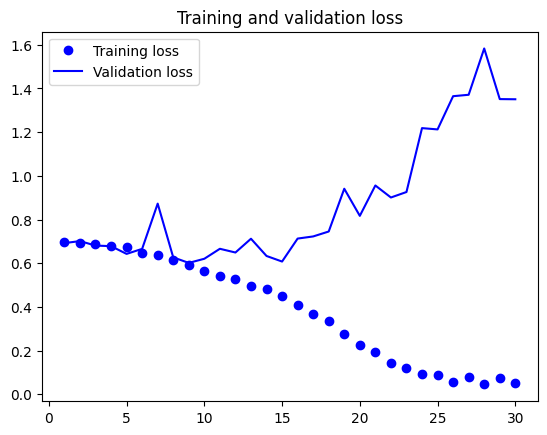

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [17]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6547 - loss: 0.6181
Test accuracy: 0.654
Test loss: 0.627


In [18]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6709 - loss: 0.5885
Validation accuracy: 0.662
Validation loss: 0.601


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [19]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

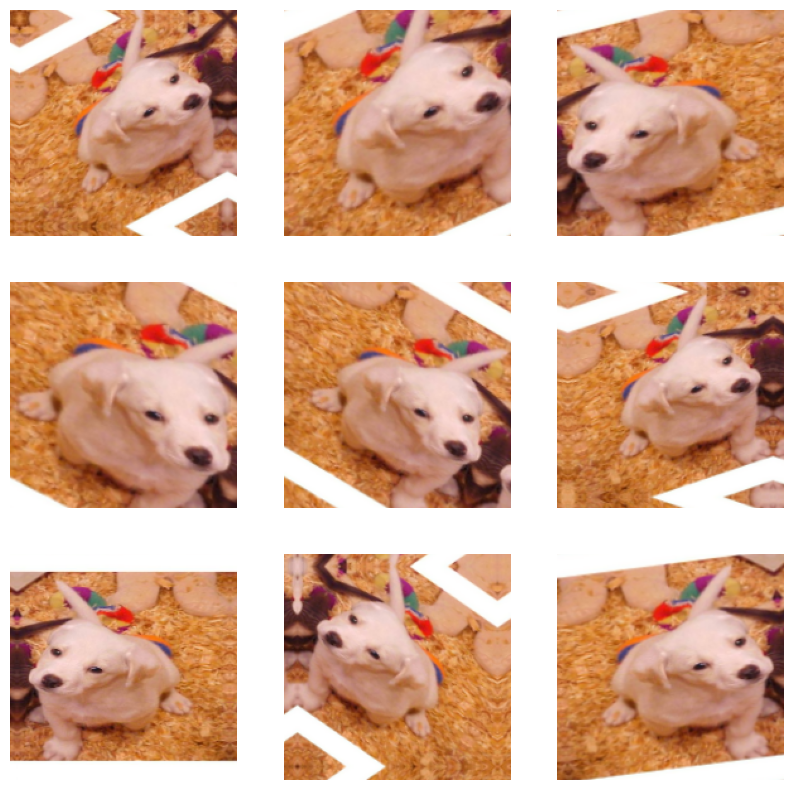

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [21]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5080 - loss: 0.9632 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4909 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.4740 - loss: 0.6941 - val_accuracy: 0.5620 - val_loss: 0.6925
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5443 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.4971 - loss: 0.6949 - val_accuracy: 0.6420 - val_loss: 0.6877
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5754 - loss: 0.6894 - val_accuracy: 0.5000 - val_loss: 0.7844
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5542 - loss: 0.7015 - val_accuracy: 0.5000 - val_loss: 1.2180
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5727 - loss: 0.7469 - val_accuracy: 0.5880 - v

**Evaluating the model on the test set**

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7482 - loss: 0.5382
Test accuracy: 0.740
Test loss: 0.573


In [24]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7700 - loss: 0.5049
Validation accuracy: 0.762
Validation loss: 0.527


Question 2 :Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve?

# **Model 2**

In [25]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=700)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [27]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [28]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [29]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [30]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.5147 - loss: 0.7313 - val_accuracy: 0.6160 - val_loss: 0.6924
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5372 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5345 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5380 - loss: 0.7017 - val_accuracy: 0.5000 - val_loss: 0.7021
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5901 - loss: 0.6760 - val_accuracy: 0.6440 - val_loss: 0.6444
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6098 - loss: 0.6641 - val_accuracy: 0.6380 - val_loss: 0.6566
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6650 - loss: 0.6361 - val_accuracy: 0.6920 - val_loss: 0.6052
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.6711 - loss: 0.6084 - val_accuracy: 0.6880 - 

**Displaying curves of loss and accuracy during training**

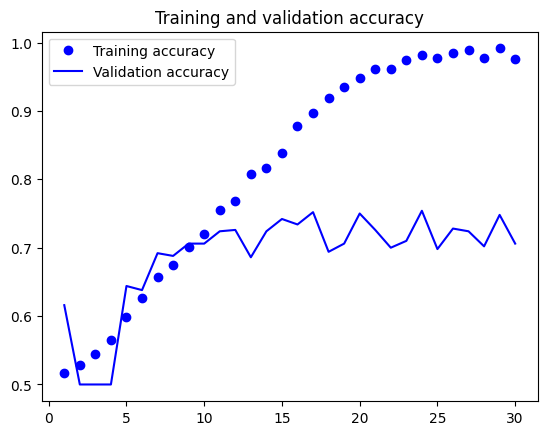

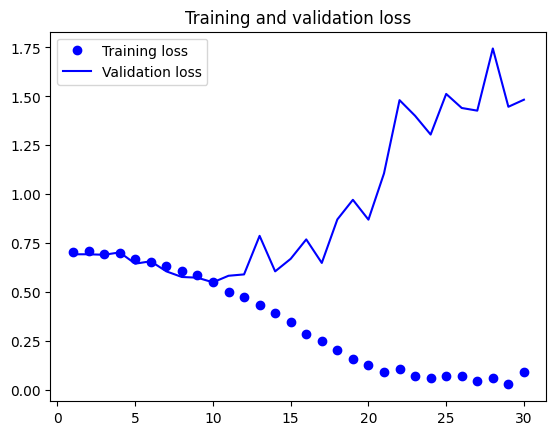

In [32]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [33]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6664 - loss: 0.5879
Test accuracy: 0.668
Test loss: 0.606


In [34]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7108 - loss: 0.5416
Validation accuracy: 0.706
Validation loss: 0.549


# Using data augmentation

**Define a data augmentation stage to add to an image model**

In [35]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

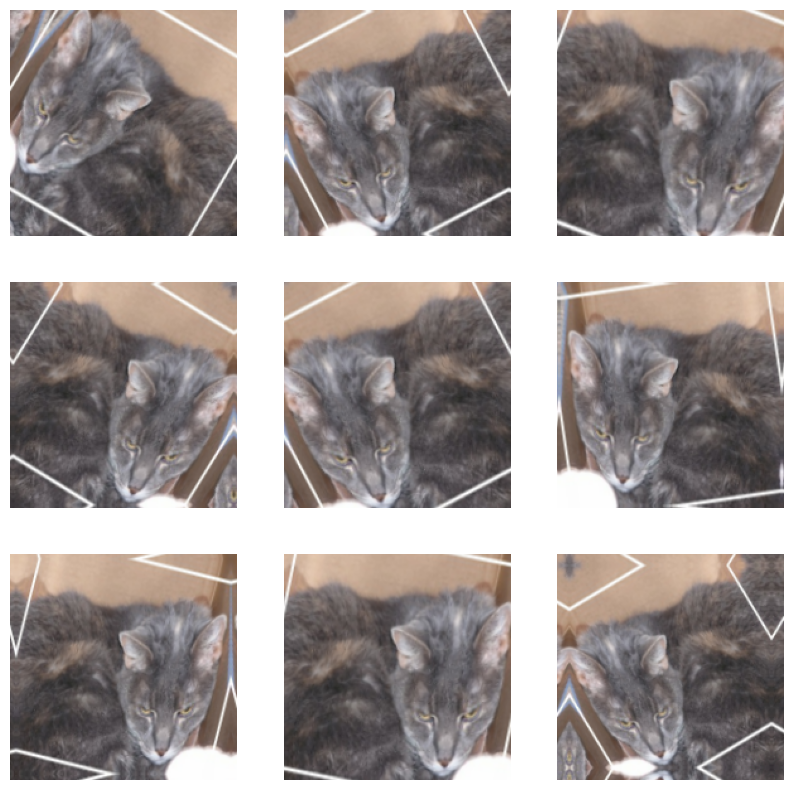

In [36]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [37]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5050 - loss: 0.7285 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4978 - loss: 0.6945 - val_accuracy: 0.5040 - val_loss: 0.6915
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5312 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5450 - loss: 0.6908 - val_accuracy: 0.5080 - val_loss: 0.6904
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5157 - loss: 0.6981 - val_accuracy: 0.5700 - val_loss: 0.6717
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6001 - loss: 0.6750 - val_accuracy: 0.6420 - val_loss: 0.6510
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5852 - loss: 0.6728 - val_accuracy: 0.5060 - val_loss: 0.8010
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6454 - loss: 0.6480 - val_accuracy: 0.6180 - v

**Evaluating the model on the test set**

In [39]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7434 - loss: 0.6313
Test accuracy: 0.758
Test loss: 0.564


In [40]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8069 - loss: 0.4488
Validation accuracy: 0.792
Validation loss: 0.458


Question 3: Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

# **Model 3**

In [41]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 3000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=800)
make_subset("validation", start_index=1200, end_index=1450)
make_subset("test", start_index=1700, end_index=1950)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train3/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train3/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train3/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train3/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train3/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train3/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [43]:
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [44]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [45]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [46]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [47]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5121 - loss: 0.7094 - val_accuracy: 0.5060 - val_loss: 0.6924
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4800 - loss: 0.6941 - val_accuracy: 0.5040 - val_loss: 0.6910
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5629 - loss: 0.6887 - val_accuracy: 0.5680 - val_loss: 0.6833
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5845 - loss: 0.6869 - val_accuracy: 0.5940 - val_loss: 0.6623
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6121 - loss: 0.6623 - val_accuracy: 0.6320 - val_loss: 0.6528
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6596 - loss: 0.6192 - val_accuracy: 0.6560 - val_loss: 0.6087
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6784 - loss: 0.5962 - val_accuracy: 0.6780 - val_loss: 0.5914
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7007 - loss: 0.5619 - val_accuracy: 0.6540 - 

**Displaying curves of loss and accuracy during training**

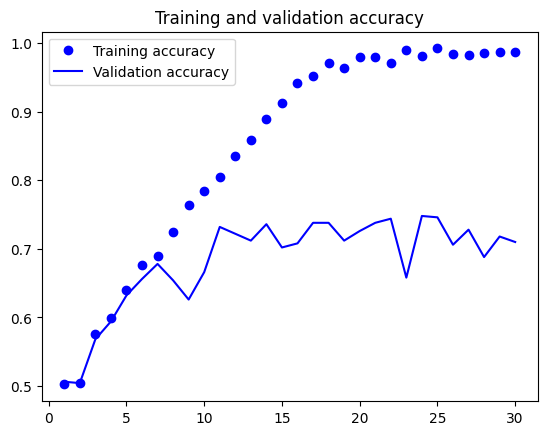

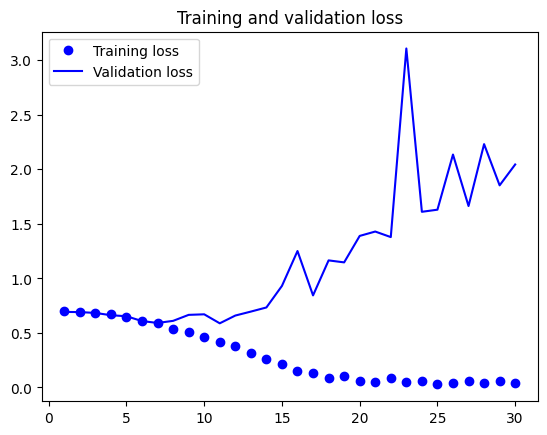

In [48]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**



In [49]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7171 - loss: 0.6101
Test accuracy: 0.714
Test loss: 0.593


In [50]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7337 - loss: 0.5621
Validation accuracy: 0.732
Validation loss: 0.588


#Using data augmentation

**Define a data augmentation stage to add to an image model**

In [51]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

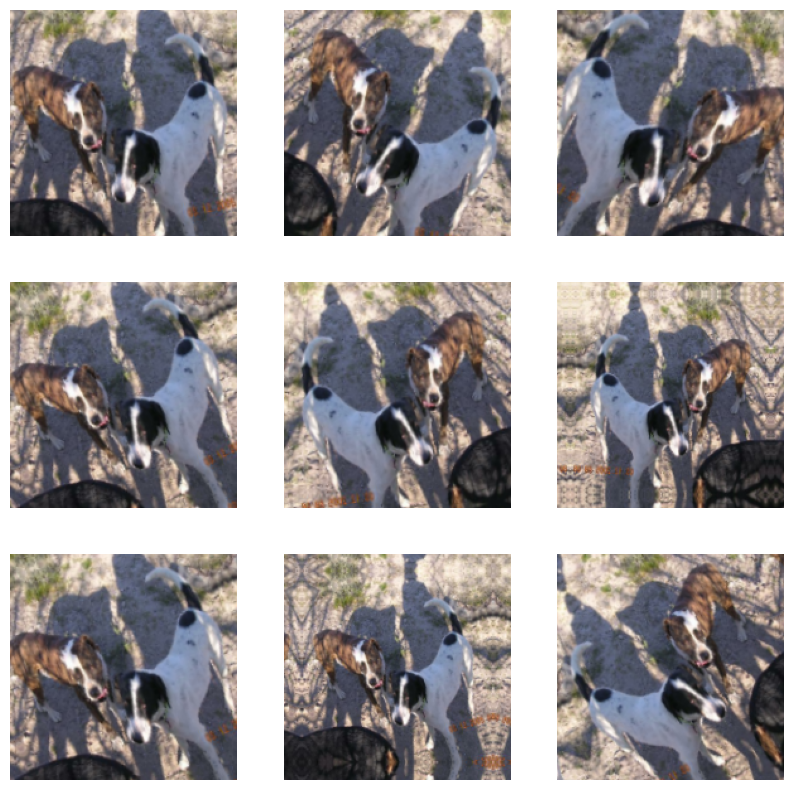

In [52]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [53]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [54]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.5058 - loss: 0.6989 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5016 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6905
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5490 - loss: 0.6902 - val_accuracy: 0.5540 - val_loss: 0.6838
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.5830 - loss: 0.6705 - val_accuracy: 0.6320 - val_loss: 0.6211
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6196 - loss: 0.6495 - val_accuracy: 0.6280 - val_loss: 0.6767
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6532 - loss: 0.6403 - val_accuracy: 0.5860 - val_loss: 0.7734
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6602 - loss: 0.6152 - val_accuracy: 0.6480 - val_loss: 0.6094
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6618 - loss: 0.6131 - val_accuracy: 0.6540 - v

**Evaluating the model on the test set**

In [55]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8199 - loss: 0.4421
Test accuracy: 0.838
Test loss: 0.431


In [56]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8440 - loss: 0.3712
Validation accuracy: 0.824
Validation loss: 0.424


# **Model 4**

In [57]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 2500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=900)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [58]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [59]:
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [60]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1800 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [61]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [62]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [63]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.5080 - loss: 0.7781 - val_accuracy: 0.6180 - val_loss: 0.6916
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5426 - loss: 0.6925 - val_accuracy: 0.5240 - val_loss: 0.6910
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5395 - loss: 0.6904 - val_accuracy: 0.5600 - val_loss: 0.6792
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6237 - loss: 0.6615 - val_accuracy: 0.6180 - val_loss: 0.6754
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6626 - loss: 0.6157 - val_accuracy: 0.6860 - val_loss: 0.5725
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6885 - loss: 0.5845 - val_accuracy: 0.6740 - val_loss: 0.6069
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7009 - loss: 0.5653 - val_accuracy: 0.6900 - val_loss: 0.5984
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7290 - loss: 0.5490 - val_accuracy: 0.7040 - 

**Displaying curves of loss and accuracy during training**

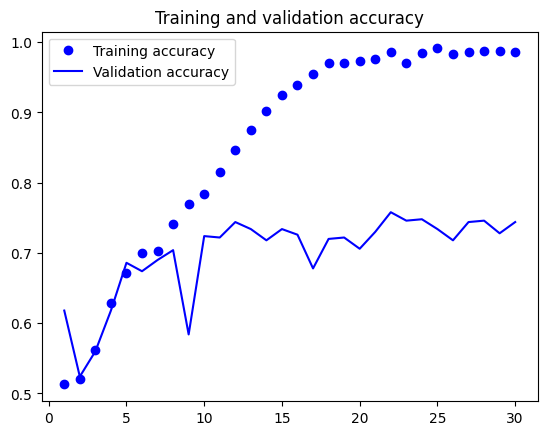

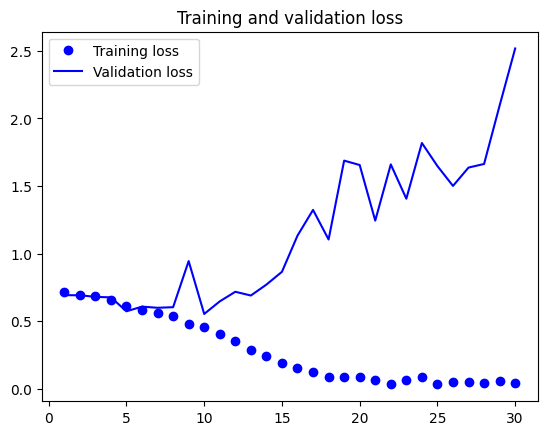

In [64]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [65]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7006 - loss: 0.5959
Test accuracy: 0.692
Test loss: 0.615


In [66]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7326 - loss: 0.5424
Validation accuracy: 0.724
Validation loss: 0.553


#Using data augmentation

**Define a data augmentation stage to add to an image model**



In [67]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

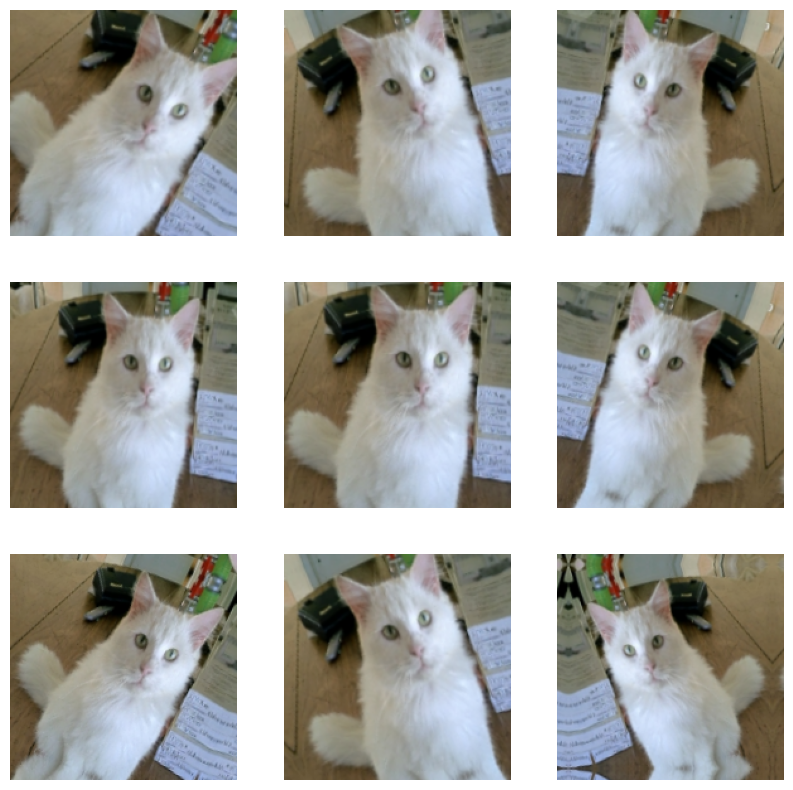

In [68]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [69]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**



In [70]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.4904 - loss: 0.7981 - val_accuracy: 0.5300 - val_loss: 0.6926
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5280 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5132 - loss: 0.7028 - val_accuracy: 0.5180 - val_loss: 0.6886
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5251 - loss: 0.7090 - val_accuracy: 0.5040 - val_loss: 0.6935
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5471 - loss: 0.6884 - val_accuracy: 0.5020 - val_loss: 0.7736
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5763 - loss: 0.6860 - val_accuracy: 0.5960 - val_loss: 0.6529
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6216 - loss: 0.6550 - val_accuracy: 0.6100 - val_loss: 0.6545
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6524 - loss: 0.6346 - val_accuracy: 0.5080 - v

**Evaluating the model on the test set**

In [71]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8134 - loss: 0.5102
Test accuracy: 0.812
Test loss: 0.476


In [72]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7984 - loss: 0.4422
Validation accuracy: 0.786
Validation loss: 0.472


# **Model 5**

In [73]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train5")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train5/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train5/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train5/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train5/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train5/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train5/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [75]:
model.summary()

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**



In [76]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [77]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [78]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [79]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.5172 - loss: 0.7482 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5141 - loss: 0.6953 - val_accuracy: 0.5240 - val_loss: 0.6919
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.5149 - loss: 0.7003 - val_accuracy: 0.5260 - val_loss: 0.7394
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5717 - loss: 0.6860 - val_accuracy: 0.5280 - val_loss: 0.6829
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5990 - loss: 0.6726 - val_accuracy: 0.6020 - val_loss: 0.6401
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6360 - loss: 0.6296 - val_accuracy: 0.6680 - val_loss: 0.6190
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6727 - loss: 0.5895 - val_accuracy: 0.6600 - val_loss: 0.6027
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6978 - loss: 0.5822 - val_accuracy: 0.6440 - v

**Displaying curves of loss and accuracy during training**

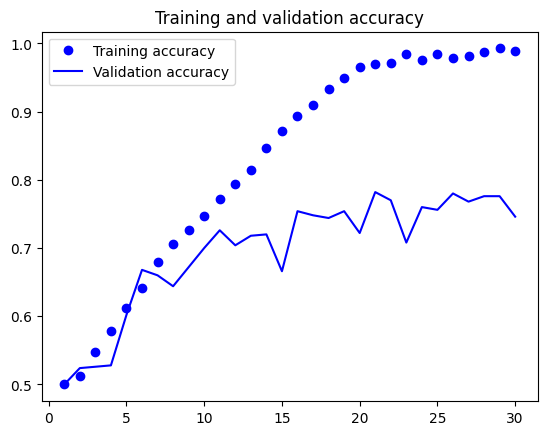

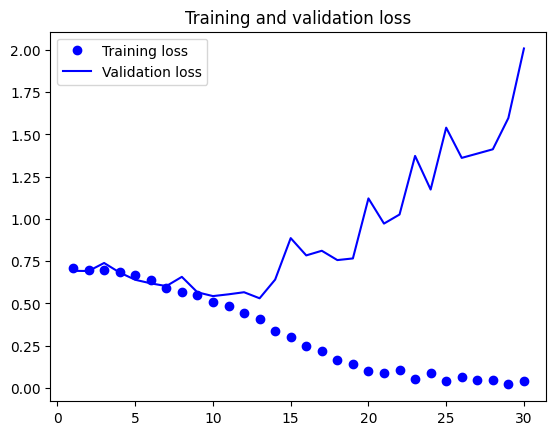

In [80]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [81]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7067 - loss: 0.5721
Test accuracy: 0.698
Test loss: 0.600


In [82]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7172 - loss: 0.5377
Validation accuracy: 0.718
Validation loss: 0.531


#Using data augmentation

**Define a data augmentation stage to add to an image model**

In [83]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

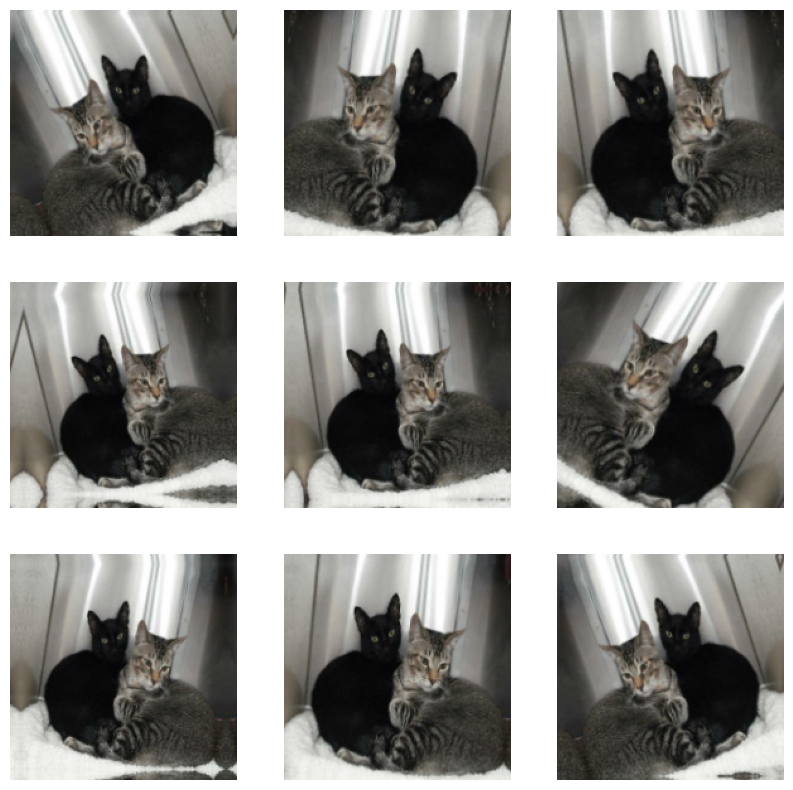

In [84]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [85]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [86]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.5090 - loss: 0.7629 - val_accuracy: 0.5020 - val_loss: 0.6926
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5244 - loss: 0.7029 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5270 - loss: 0.6936 - val_accuracy: 0.5060 - val_loss: 0.6972
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.5512 - loss: 0.6884 - val_accuracy: 0.5240 - val_loss: 0.6823
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5911 - loss: 0.6741 - val_accuracy: 0.5920 - val_loss: 0.6734
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.6073 - loss: 0.6558 - val_accuracy: 0.5660 - val_loss: 0.6868
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.6475 - loss: 0.6403 - val_accuracy: 0.6060 - val_loss: 0.6478
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6455 - loss: 0.6386 - val_accuracy: 0.6660 - v

**Evaluating the model on the test set**

In [87]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8369 - loss: 0.4078
Test accuracy: 0.814
Test loss: 0.484


In [88]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8131 - loss: 0.4372
Validation accuracy: 0.826
Validation loss: 0.407


Question 4: Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

## **Leveraging a pretrained model**



# **Model 6**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [89]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [90]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train1/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train1/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train1/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train1/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train1/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train1/test/dogs


In [92]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [93]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [94]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [95]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [96]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [97]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 247ms/step - accuracy: 0.7813 - loss: 46.7721 - val_accuracy: 0.9720 - val_loss: 3.1747
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9620 - loss: 4.2874 - val_accuracy: 0.9660 - val_loss: 6.1097
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.9592 - loss: 3.8311 - val_accuracy: 0.9760 - val_loss: 4.4917
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.9632 - loss: 4.1729 - val_accuracy: 0.9600 - val_loss: 9.0044
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.9623 - loss: 3.2477 - val_accuracy: 0.9700 - val_loss: 4.7747
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9684 - loss: 2.8129 - val_accuracy: 0.9460 - val_loss: 9.2542
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.9685 - loss: 4.6408 - val_accuracy: 0.9740 - val_loss: 6.3971
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.9657 - loss: 4.8354 - val_accuracy:

**Evaluating the model on the test set**

In [98]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9604 - loss: 7.3573
Test accuracy: 0.960
Test loss: 7.235


In [99]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9657 - loss: 3.9937
Validation accuracy: 0.972
Validation loss: 3.175


# **Model 7**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [100]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [101]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=700)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


In [103]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [104]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [105]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [106]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [107]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [108]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - accuracy: 0.8248 - loss: 25.1044 - val_accuracy: 0.9760 - val_loss: 2.3604
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.9439 - loss: 5.7079 - val_accuracy: 0.9680 - val_loss: 3.0910
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.9445 - loss: 6.0516 - val_accuracy: 0.9600 - val_loss: 7.3805
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9530 - loss: 5.5419 - val_accuracy: 0.9540 - val_loss: 8.1767
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.9504 - loss: 5.3462 - val_accuracy: 0.9800 - val_loss: 3.0268
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9604 - loss: 4.9411 - val_accuracy: 0.9760 - val_loss: 4.3451
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9768 - loss: 2.7342 - val_accuracy: 0.9820 - val_loss: 2.8271
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.9667 - loss: 3.4543 - val_accurac

**Evaluating the model on the test set**

In [109]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9812 - loss: 4.3207
Test accuracy: 0.980
Test loss: 4.092


In [110]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9846 - loss: 0.8359
Validation accuracy: 0.986
Validation loss: 1.427


# **Model 8**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [111]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [112]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 3000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=800)
make_subset("validation", start_index=1200, end_index=1450)
make_subset("test", start_index=1700, end_index=1950)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train3/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train3/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train3/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train3/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train3/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train3/test/dogs


In [114]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [115]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [116]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [117]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**



In [118]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [119]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.8168 - loss: 41.1825 - val_accuracy: 0.9680 - val_loss: 2.9246
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.9357 - loss: 9.3582 - val_accuracy: 0.9620 - val_loss: 4.7007
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.9524 - loss: 5.2981 - val_accuracy: 0.9560 - val_loss: 12.9058
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9607 - loss: 4.5784 - val_accuracy: 0.9680 - val_loss: 7.4560
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.9616 - loss: 5.8012 - val_accuracy: 0.9660 - val_loss: 6.1486
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.9737 - loss: 2.9220 - val_accuracy: 0.9740 - val_loss: 3.7546
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.9675 - loss: 4.3698 - val_accuracy: 0.9720 - val_loss: 4.4378
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9728 - loss: 2.7587 - val_accura

**Evaluating the model on the test set**

In [120]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9751 - loss: 3.2579
Test accuracy: 0.980
Test loss: 2.123


In [121]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9763 - loss: 2.8752
Validation accuracy: 0.974
Validation loss: 2.418


# **Model 9**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [122]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [123]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

make_subset("train", start_index=0, end_index=900)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


In [125]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1800 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [126]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [127]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [128]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [129]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [130]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.8092 - loss: 44.6951 - val_accuracy: 0.9400 - val_loss: 9.1377
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.9128 - loss: 12.1561 - val_accuracy: 0.9760 - val_loss: 3.5760
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9481 - loss: 5.7493 - val_accuracy: 0.9560 - val_loss: 5.5749
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9454 - loss: 5.4662 - val_accuracy: 0.9620 - val_loss: 4.6962
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.9627 - loss: 4.2267 - val_accuracy: 0.9660 - val_loss: 7.0537
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.9624 - loss: 4.0813 - val_accuracy: 0.9600 - val_loss: 6.0356
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - accuracy: 0.9625 - loss: 3.3519 - val_accuracy: 0.9780 - val_loss: 2.1538
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9654 - loss: 4.9913 - val_accurac

**Evaluating the model on the test set**

In [131]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9802 - loss: 2.9504
Test accuracy: 0.978
Test loss: 3.125


In [132]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9879 - loss: 1.3001
Validation accuracy: 0.988
Validation loss: 1.373


# **Model 10**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [133]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [134]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train5")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train5/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train5/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train5/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train5/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train5/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train5/test/dogs


In [136]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [137]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [138]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [139]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [140]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.8326 - loss: 34.3284 - val_accuracy: 0.9600 - val_loss: 7.5617
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9349 - loss: 9.5201 - val_accuracy: 0.9720 - val_loss: 6.7559
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9493 - loss: 7.2752 - val_accuracy: 0.9720 - val_loss: 6.4368
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.9454 - loss: 6.5211 - val_accuracy: 0.9600 - val_loss: 7.3481
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.9666 - loss: 4.3563 - val_accuracy: 0.9840 - val_loss: 3.4269
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.9777 - loss: 3.0294 - val_accuracy: 0.9760 - val_loss: 4.5829
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.9758 - loss: 3.2726 - val_accuracy: 0.9600 - val_loss: 9.2761
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.9610 - loss: 5.8774 - val_accurac

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")
